# Cervical Cancer Risk Factors
- Sara Echeverría 21371
- Melissa Pérez 21385

Repositorio de github: https://github.com/bl33h/cervicalCancerRiskFactors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/risk_factors_cervical_cancer.csv', encoding='latin1')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dataTypes = df.dtypes
print(dataTypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [6]:
df.replace('?', np.nan, inplace=True)

# Sexual partners to int
df['Number of sexual partners'] = pd.to_numeric(df['Number of sexual partners'], errors='coerce')
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(0)
df['Number of sexual partners'] = df['Number of sexual partners'].astype(int)

# Convert numerical columns to float
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                  'Num of pregnancies', 'Smokes', 'Smokes (years)', 
                  'Smokes (packs/year)', 'Hormonal Contraceptives', 
                  'Hormonal Contraceptives (years)', 'IUD', 
                  'IUD (years)', 'STDs', 'STDs (number)', 
                  'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 
                  'STDs: Time since last diagnosis']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    int64  
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [11]:
numerical_summary = df.describe()

# Summary statistics for categorical variables
categorical_cols = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 
                    'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
categorical_summary = df[categorical_cols].describe()

# Mostrar los DataFrames
print("Numerical Summary Statistics")
print(numerical_summary)

print("\nCategorical Summary Statistics")
print(categorical_summary)

Numerical Summary Statistics
              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.22

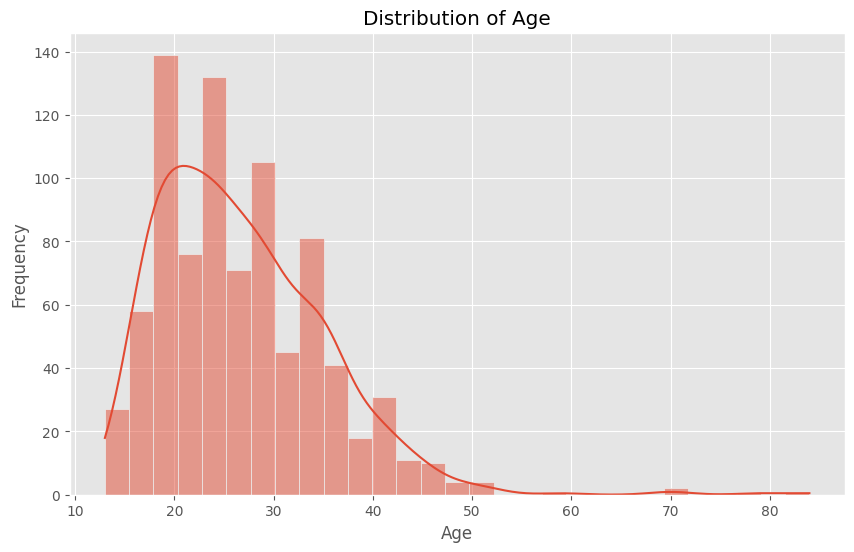

In [12]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

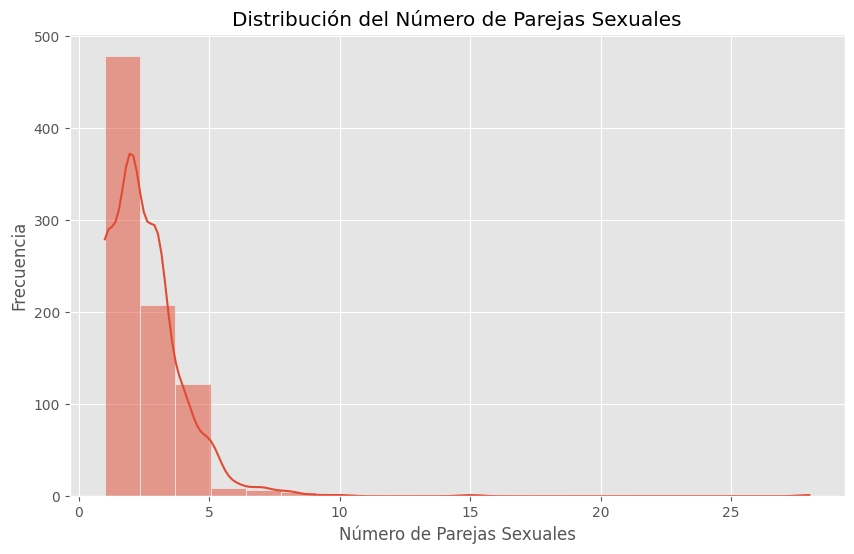

In [13]:
# Histogram for Sexual Partners
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of sexual partners'].dropna(), kde=True, bins=20)
plt.title('Distribución del Número de Parejas Sexuales')
plt.xlabel('Número de Parejas Sexuales')
plt.ylabel('Frecuencia')
plt.show()

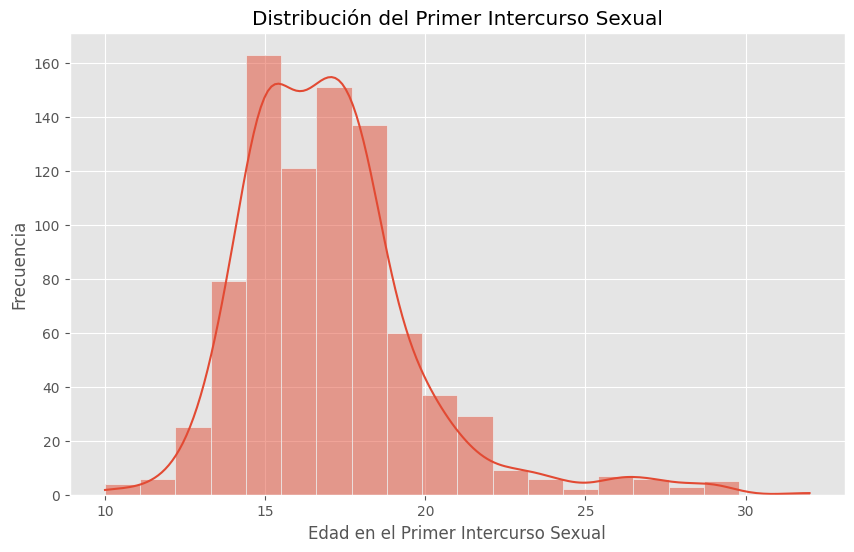

In [14]:
# Histogram for First Sexual Intercourse
plt.figure(figsize=(10, 6))
sns.histplot(df['First sexual intercourse'].dropna(), kde=True, bins=20)
plt.title('Distribución del Primer Intercurso Sexual')
plt.xlabel('Edad en el Primer Intercurso Sexual')
plt.ylabel('Frecuencia')
plt.show()

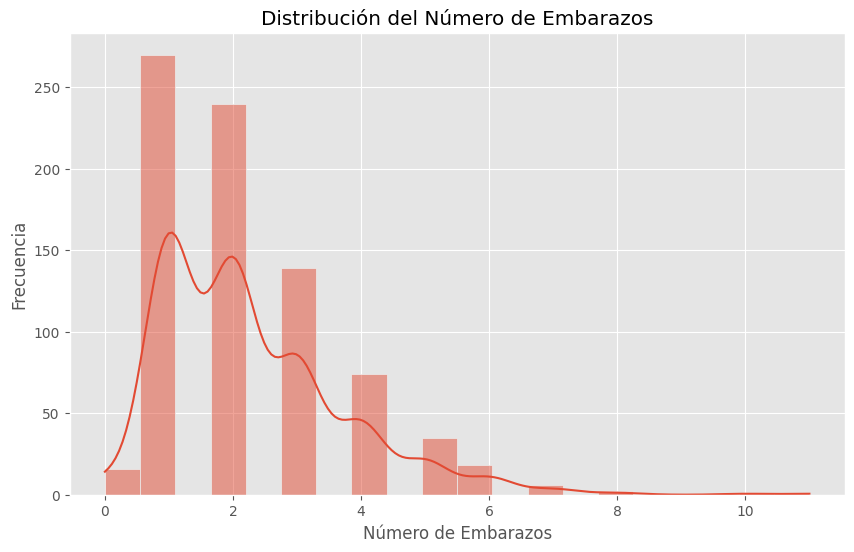

In [16]:
# Histogram for Number of Pregnancies
plt.figure(figsize=(10, 6))
sns.histplot(df['Num of pregnancies'].dropna(), kde=True, bins=20)
plt.title('Distribución del Número de Embarazos')
plt.xlabel('Número de Embarazos')
plt.ylabel('Frecuencia')
plt.show()

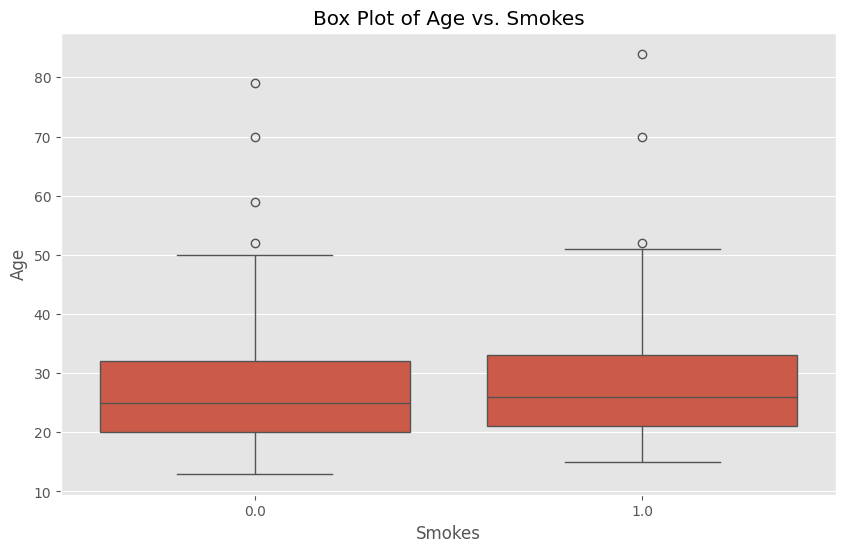

In [9]:
# Box plot: Age vs. Smokes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smokes', y='Age', data=df)
plt.title('Box Plot of Age vs. Smokes')
plt.xlabel('Smokes')
plt.ylabel('Age')
plt.show()

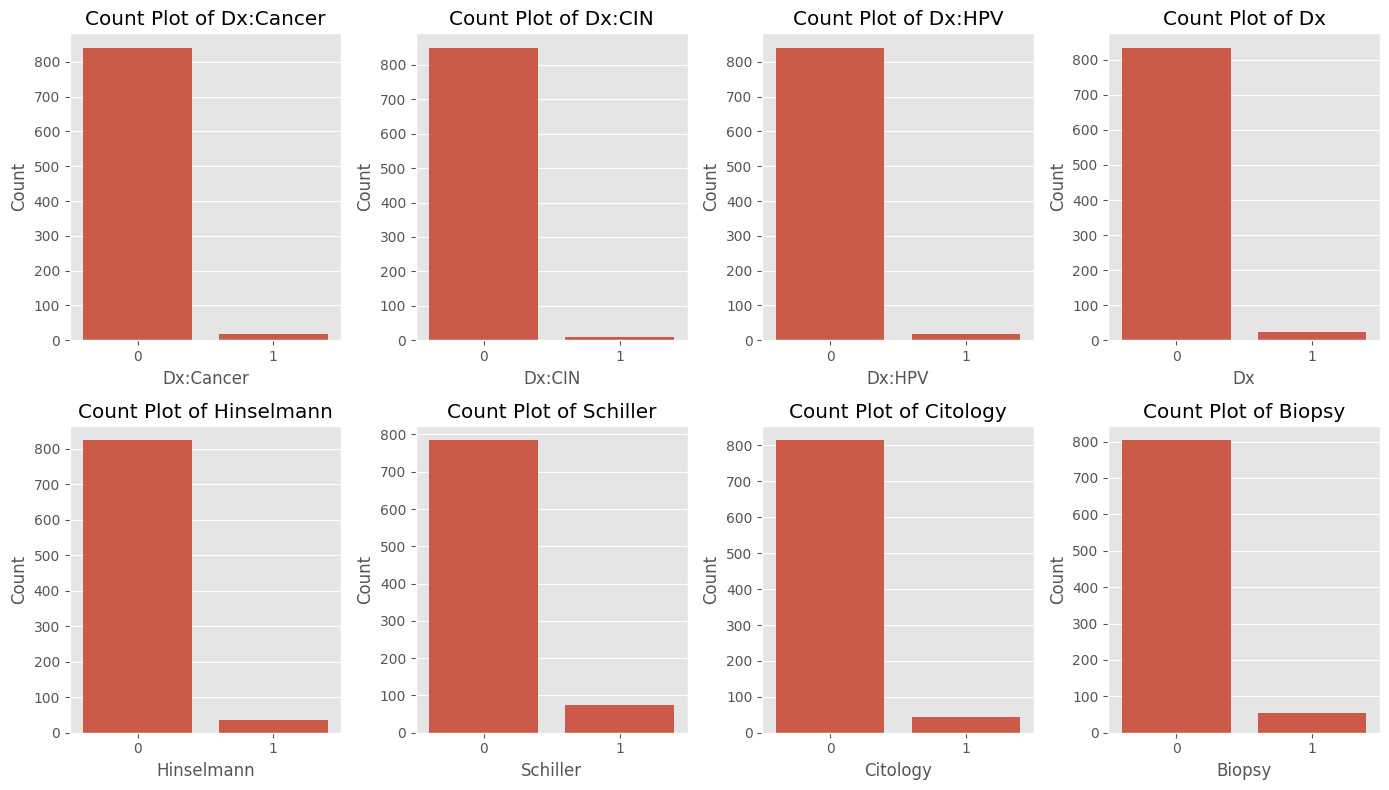

In [10]:
# Count plots for categorical variables
plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()